In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [ ]:
sale_df = pd.read_csv('CompanySalesData.csv')
sale_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


For a given CSE File.
a) Read Total profit of all months and show it using a bar chart

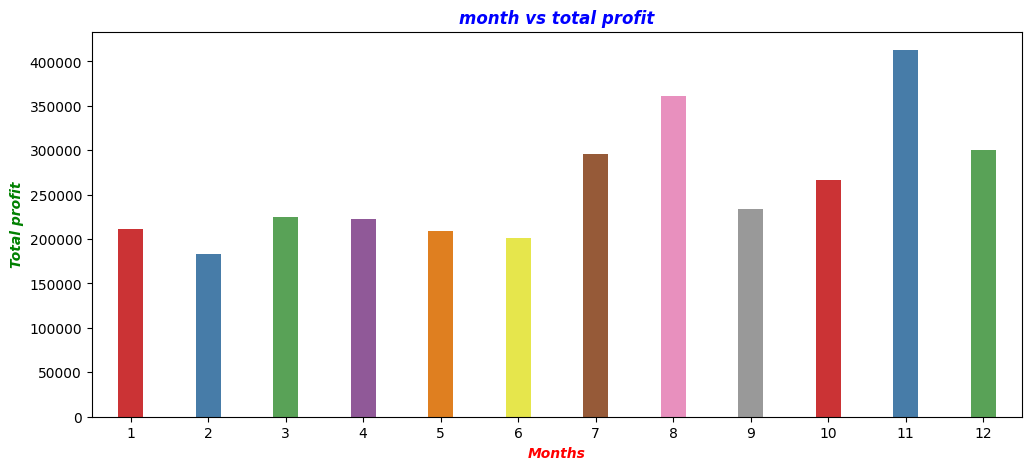

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=sale_df,x='month_number',y='total_profit',hue='month_number',errorbar=None,gap=0.6,palette='Set1',legend=False)
plt.title('month vs total profit',fontdict={'color':'blue','fontweight':'bold','fontstyle':'oblique','fontsize':12})
plt.xlabel('Months',fontdict={'color':'red','fontweight':'bold','fontstyle':'italic','fontsize':10})
plt.ylabel('Total profit',fontdict={'color':'green','fontweight':'bold','fontstyle':'italic','fontsize':10})
plt.show()

b) Get total profit of all months and show line plot with the following Style properties
• Line Style dotted and Line-color should be red
• Show legend at the lower right location.
• X label name = Month Number
• Y label name = Sold units number
• Add a circle marker.
• Line marker color as read
• Line width should be 3

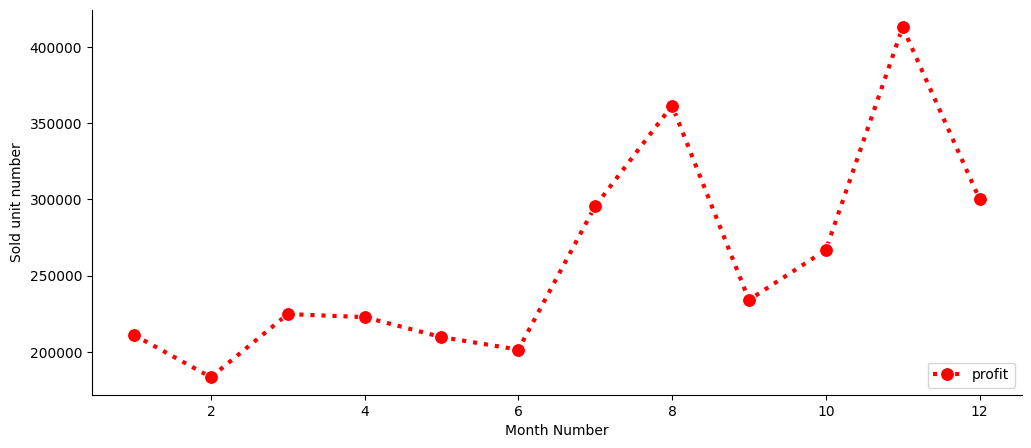

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=sale_df,x='month_number',y='total_profit',ax=ax,linestyle='dotted',label='profit',linewidth=3,color='red',marker='o',markersize=10)
plt.xlabel('Month Number')
plt.ylabel('Sold unit number')
plt.legend(loc='lower right')
for i in ['top','right']: 
    ax.spines[i].set_visible(False)
fig.show()

c) Read all product sales data and show it using a scatter plot

In [ ]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  12 non-null     int64
 1   facecream     12 non-null     int64
 2   facewash      12 non-null     int64
 3   toothpaste    12 non-null     int64
 4   bathingsoap   12 non-null     int64
 5   shampoo       12 non-null     int64
 6   moisturizer   12 non-null     int64
 7   total_units   12 non-null     int64
 8   total_profit  12 non-null     int64
dtypes: int64(9)
memory usage: 992.0 bytes


In [ ]:
copy_sale_data = sale_df.iloc[:,:7].copy()
copy_sale_data.head(2)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200


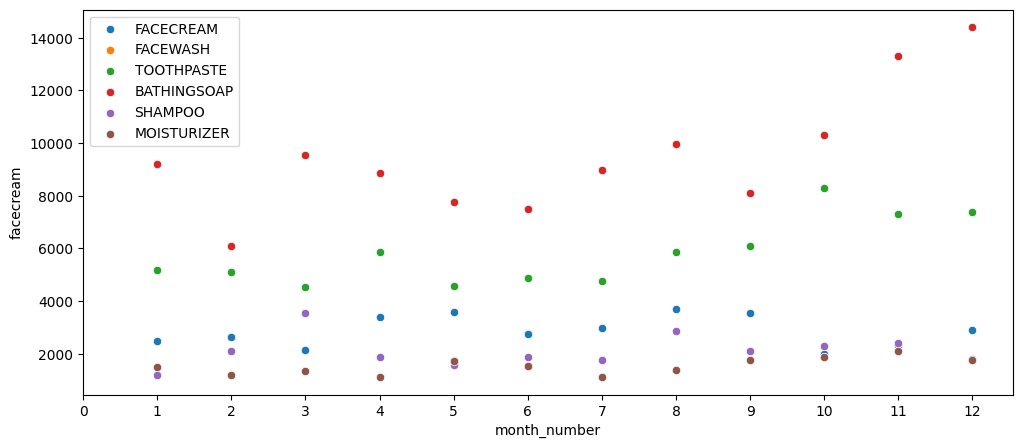

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
for i in copy_sale_data.columns[1:]:
    sns.scatterplot(data=copy_sale_data,x='month_number',y=i,label=i.upper())
m = np.arange(0,13,1)
ax.set_xticks(m) 
fig.show()

d) Read toothpaste sales data of each month and show it using the bar chart.

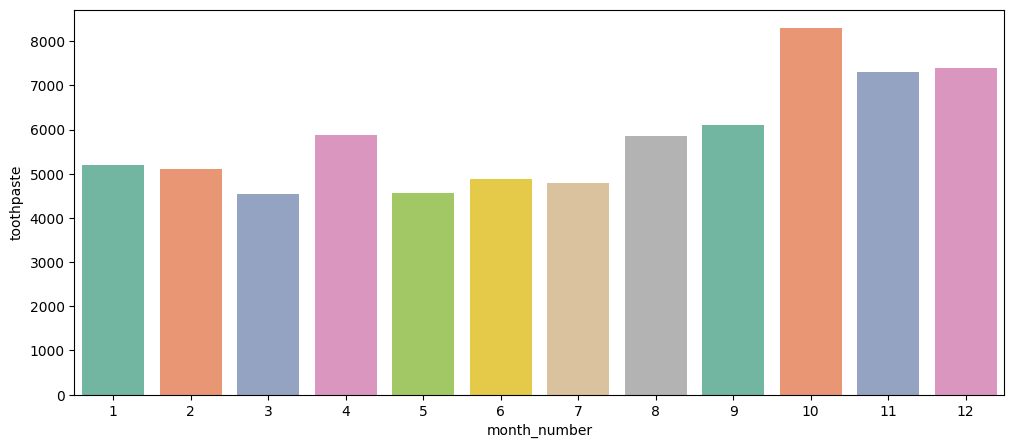

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=copy_sale_data,x='month_number',y='toothpaste',ax=ax,hue='month_number',legend=False,palette='Set2',)

fig.show()

e) Read face cream and facewash product sales data and show it using the multiline plot

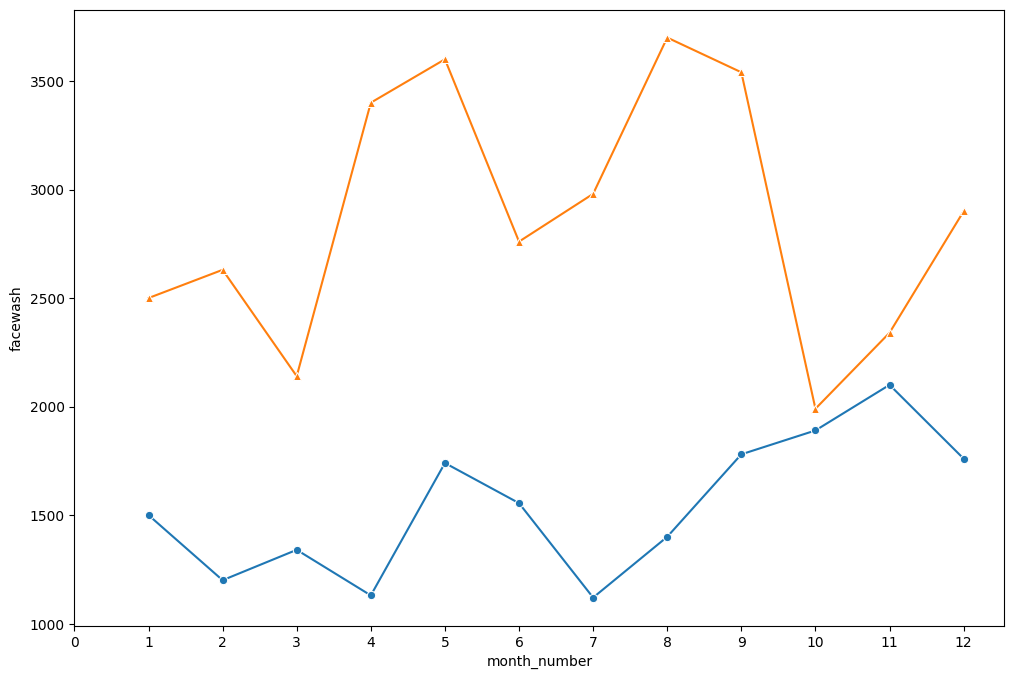

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=copy_sale_data,x='month_number',y='facewash',marker='o')
sns.lineplot(data=copy_sale_data,x='month_number',y='facecream',marker='^')
plt.xticks(m)
plt.show()

f) Read sales data of bathing soap of all months and show it using a line plot

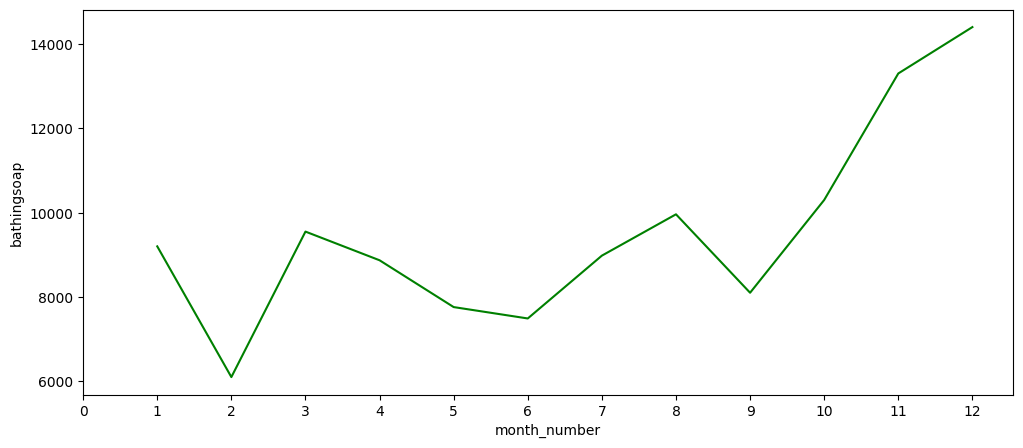

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=copy_sale_data,x='month_number',y='bathingsoap',color='green',legend=False)
plt.xticks(m)
plt.show()

g Read the total profit of each month and show it using the histogram to see the most
common profit ranges

In [ ]:
sale_m_profit = sale_df[['month_number','total_profit']].copy()
sale_m_profit.groupby(['total_profit'])['month_number'].count()

total_profit
183300    1
201400    1
209600    1
211000    1
222700    1
224700    1
234000    1
266700    1
295500    1
300200    1
361400    1
412800    1
Name: month_number, dtype: int64

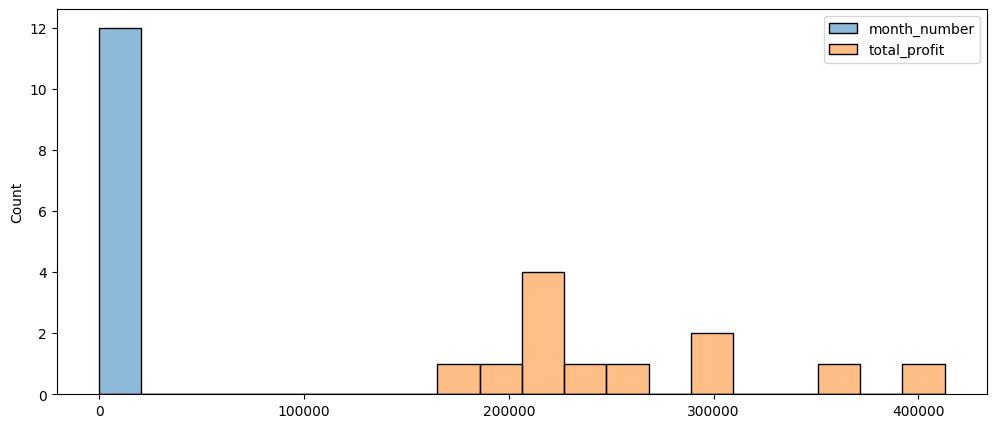

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data=sale_m_profit,bins=20)
plt.show()

h) Calculate total sale data for last year for each product and show it using a Pie chart

In [ ]:
last = sale_df.tail(1).iloc[-1,1:7].reset_index()
last.rename(columns=dict(zip(last.columns,['item','total_sale'])),inplace=True)

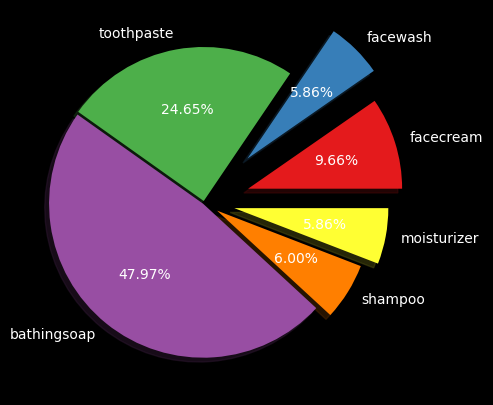

In [ ]:
plt.figure(figsize=(12,5),facecolor='black')
palette_color = sns.color_palette('Set1')
ex=[0.3,0.4,0.01,0.01,0.1,0.2]
plt.pie(last['total_sale'],labels=last['item'],
            colors=palette_color,explode=ex,autopct='%.2f%%',
            shadow=True,textprops={'color':'white'},
            frame=False)

plt.show()

i) Read Bathing soap facewash of all months and display it using the Subplot

In [ ]:
sale_df.head(2)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300


In [ ]:
b_f_data = sale_df[['month_number','facewash','bathingsoap']].copy()

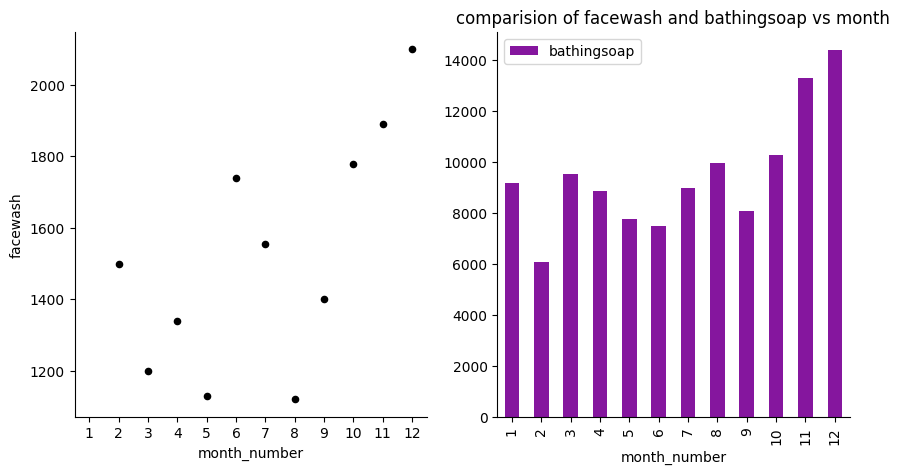

In [ ]:
figure,ax = plt.subplots(1,2,figsize=(10,5),sharex=True)
b_f_data.plot(x='month_number',y='facewash',ax=ax[0],kind='scatter',color='black')
b_f_data.plot(x='month_number',y='bathingsoap',ax=ax[1],kind='bar',color='#85169e')
spi = ['top','right']
for i in range(2):
    ax[i].spines[spi[0]].set_visible(False)
    ax[i].spines[spi[1]].set_visible(False)
plt.title('comparision of facewash and bathingsoap vs month')
figure.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fa5ce7f7-b415-4054-b9ce-e555f5e878da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>